## Kaggle Competetion (Since Aug./7th/2016)

### Predicting Red Hat Business Value

Like most companies, Red Hat is able to gather a great deal of information over time about the behavior of individuals who interact with them. They’re in search of better methods of using this behavioral data to predict which individuals they should approach—and even when and how to approach them.

In this competition, Kagglers are challenged to <b>create a classification algorithm</b> that accurately identifies which <u>customers have the most potential business value</u> for Red Hat based on their characteristics and activities.

With an improved prediction model in place, Red Hat will be able to more efficiently prioritize resources to generate more business and better serve their customers.

### Data Samples
This competition uses two separate data files that may be joined together to create a single, unified data table: a people file and an activity file.

The **people file** contains all of the **unique people** (and the corresponding characteristics) that have performed activities over time. Each row in the people file represents a unique person. Each person has a unique **people_id**.

The **activity file** contains *all of the unique activities* (and the corresponding activity characteristics) that each person has performed over time. Each row in the activity file represents **a unique activity** performed by a person on **a certain date**. Each activity has **a unique activity_id**.

The challenge of this competition is **to predict the potential business value of a person who has performed a specific activity**. *The business value outcome is defined by a yes/no field attached to each unique activity in the activity file*. The outcome field indicates whether or not each person has completed the outcome within a fixed window of time after each unique activity was performed.

The activity file contains *several different categories of activities*. Type 1 activities are different from type 2-7 activities because there are more known characteristics associated with type 1 activities (nine in total) than type 2-7 activities (which have only one associated characteristic).

To develop a predictive model with this data, you will likely **need to join the files together into a single data set**. The two files can be joined together using person_id as the common key. All variables are categorical, with the exception of 'char_38' in the people file, which is a continuous numerical variable.

predict potential business value => defined by yes/no attached to each unique activity => indicates whether or not each person has completed the outcome within a fixed window of time after unique activity



In [1]:
# Load data files : people and an activity
import pandas as pd

people = pd.read_csv("./data/people.csv")
activity = pd.read_csv("./data/act_train.csv")

In [2]:
people.head(3)

,people_id,char_1,group_1,char_2,date,char_3,char_4,char_5,char_6,char_7,...,char_29,char_30,char_31,char_32,char_33,char_34,char_35,char_36,char_37,char_38
0,ppl_100,type 2,group 17304,type 2,2021-06-29,type 5,type 5,type 5,type 3,type 11,...,False,True,True,False,False,True,True,True,False,36
1,ppl_100002,type 2,group 8688,type 3,2021-01-06,type 28,type 9,type 5,type 3,type 11,...,False,True,True,True,True,True,True,True,False,76
2,ppl_100003,type 2,group 33592,type 3,2022-06-10,type 4,type 8,type 5,type 2,type 5,...,False,False,True,True,True,True,False,True,True,99


In [38]:
ppl_list = people.columns
# for i in range(len(ppl_list)):
#     print ppl_list[i],
ppl_list

Index([u'people_id', u'char_1', u'group_1', u'char_2', u'date', u'char_3',
       u'char_4', u'char_5', u'char_6', u'char_7', u'char_8', u'char_9',
       u'char_10', u'char_11', u'char_12', u'char_13', u'char_14', u'char_15',
       u'char_16', u'char_17', u'char_18', u'char_19', u'char_20', u'char_21',
       u'char_22', u'char_23', u'char_24', u'char_25', u'char_26', u'char_27',
       u'char_28', u'char_29', u'char_30', u'char_31', u'char_32', u'char_33',
       u'char_34', u'char_35', u'char_36', u'char_37', u'char_38'],
      dtype='object')

In [44]:
colnames = [u'people_id', u'date', u'group_1', u'char_1', u'char_2', u'char_3', u'char_4',
            u'char_5', u'char_6', u'char_7', u'char_8', u'char_9', u'char_10', u'char_11', 
            u'char_12', u'char_13', u'char_14', u'char_15', u'char_16', u'char_17', u'char_18', 
            u'char_19', u'char_20', u'char_21', u'char_22', u'char_23', u'char_24', u'char_25', 
            u'char_26', u'char_27', u'char_28', u'char_29', u'char_30', u'char_31', u'char_32', 
            u'char_33', u'char_34', u'char_35', u'char_36', u'char_37', u'char_38']

In [45]:
people = people[colnames]

In [46]:
people.head(2)

,people_id,date,group_1,char_1,char_2,char_3,char_4,char_5,char_6,char_7,...,char_29,char_30,char_31,char_32,char_33,char_34,char_35,char_36,char_37,char_38
0,ppl_100,2021-06-29,group 17304,type 2,type 2,type 5,type 5,type 5,type 3,type 11,...,False,True,True,False,False,True,True,True,False,36
1,ppl_100002,2021-01-06,group 8688,type 2,type 3,type 28,type 9,type 5,type 3,type 11,...,False,True,True,True,True,True,True,True,False,76


In [155]:
print people['people_id'].nunique(), people['date'].nunique()

189118 1196


In [156]:
print people['char_1'].nunique()

2


In [164]:
for i in range(1, 39):
    nchar = 'char_'+str(i)
    print nchar, ":",people[nchar].nunique(), ',',

char_1 : 2 , char_2 : 3 , char_3 : 43 , char_4 : 25 , char_5 : 9 , char_6 : 7 , char_7 : 25 , char_8 : 8 , char_9 : 9 , char_10 : 2 , char_11 : 2 , char_12 : 2 , char_13 : 2 , char_14 : 2 , char_15 : 2 , char_16 : 2 , char_17 : 2 , char_18 : 2 , char_19 : 2 , char_20 : 2 , char_21 : 2 , char_22 : 2 , char_23 : 2 , char_24 : 2 , char_25 : 2 , char_26 : 2 , char_27 : 2 , char_28 : 2 , char_29 : 2 , char_30 : 2 , char_31 : 2 , char_32 : 2 , char_33 : 2 , char_34 : 2 , char_35 : 2 , char_36 : 2 , char_37 : 2 , char_38 : 101 ,


In [39]:
activity.columns

Index([u'people_id', u'activity_id', u'date', u'activity_category', u'char_1',
       u'char_2', u'char_3', u'char_4', u'char_5', u'char_6', u'char_7',
       u'char_8', u'char_9', u'char_10', u'outcome'],
      dtype='object')

In [7]:
activity['char_1'].count()

157615

In [11]:
activity['char_1'].notnull().count()

2197291

In [42]:
any(activity['char_10'].notnull())

True

In [43]:
activity[activity['char_10'].notnull()]['char_10']

0            type 76
1             type 1
2             type 1
3             type 1
4             type 1
5          type 1727
6             type 1
7             type 1
8             type 1
9             type 1
10          type 894
11          type 143
12            type 1
13          type 297
14          type 269
15            type 1
16            type 1
17            type 1
18            type 1
19          type 230
20            type 1
21            type 1
22            type 1
23            type 1
24            type 1
25          type 143
26            type 1
27          type 276
28            type 1
29            type 1
             ...    
2197261       type 1
2197262     type 418
2197263    type 1396
2197264       type 1
2197265       type 1
2197266      type 61
2197267       type 1
2197268       type 1
2197269       type 1
2197270       type 1
2197271       type 1
2197272      type 76
2197273     type 201
2197274     type 201
2197275       type 1
2197276       type 1
2197277      

In [154]:
any(activity[activity['char_10'].notnull()]['char_1'].notnull()) # everything in char_1 is null when char_10 is not null. 

False

In [40]:
activity[activity['char_1'].notnull()][:2]

,people_id,activity_id,date,activity_category,char_1,char_2,char_3,char_4,char_5,char_6,char_7,char_8,char_9,char_10,outcome
52,ppl_100025,act1_9923,2022-11-25,type 1,type 3,type 5,type 1,type 1,type 6,type 3,type 3,type 6,type 8,NaN,0
105,ppl_100033,act1_198174,2022-07-26,type 1,type 36,type 11,type 5,type 1,type 6,type 1,type 1,type 4,type 1,NaN,0


In [15]:
people[people['people_id']=='ppl_100025']

,people_id,char_1,group_1,char_2,date,char_3,char_4,char_5,char_6,char_7,...,char_29,char_30,char_31,char_32,char_33,char_34,char_35,char_36,char_37,char_38
9,ppl_100025,type 2,group 36096,type 3,2022-08-26,type 14,type 6,type 8,type 3,type 9,...,False,False,False,False,False,False,False,False,False,76


In [36]:
act_ppl_100025 = activity[activity['people_id']=='ppl_100025']
type(act_ppl_100025)
act_ppl_100025[:1]

,people_id,activity_id,date,activity_category,char_1,char_2,char_3,char_4,char_5,char_6,char_7,char_8,char_9,char_10,outcome
52,ppl_100025,act1_9923,2022-11-25,type 1,type 3,type 5,type 1,type 1,type 6,type 3,type 3,type 6,type 8,NaN,0


In [49]:
print people[people['people_id']=='ppl_100025']

    people_id        date      group_1  char_1  char_2   char_3  char_4  \
9  ppl_100025  2022-08-26  group 36096  type 2  type 3  type 14  type 6   

   char_5  char_6  char_7   ...   char_29 char_30 char_31 char_32 char_33  \
9  type 8  type 3  type 9   ...     False   False   False   False   False   

  char_34 char_35 char_36 char_37 char_38  
9   False   False   False   False      76  

[1 rows x 41 columns]


In [50]:
pd.get_option("display.max_columns")

20

In [52]:
pd.set_option("display.max_columns", 200)

In [54]:
ppl_100025 = people[people['people_id']=='ppl_100025']

In [55]:
print ppl_100025

    people_id        date      group_1  char_1  char_2   char_3  char_4  \
9  ppl_100025  2022-08-26  group 36096  type 2  type 3  type 14  type 6   

   char_5  char_6  char_7  char_8  char_9 char_10 char_11 char_12 char_13  \
9  type 8  type 3  type 9  type 6  type 6   False   False   False   False   

  char_14 char_15 char_16 char_17 char_18 char_19 char_20 char_21 char_22  \
9   False   False   False   False   False   False   False   False   False   

  char_23 char_24 char_25 char_26 char_27 char_28 char_29 char_30 char_31  \
9   False   False   False   False   False   False   False   False   False   

  char_32 char_33 char_34 char_35 char_36 char_37  char_38  
9   False   False   False   False   False   False       76  


In [63]:
print people['date'].nunique()
print sorted(people['date'].unique())

1196
['2020-05-18', '2020-05-19', '2020-05-20', '2020-05-21', '2020-05-22', '2020-05-23', '2020-05-24', '2020-05-25', '2020-05-26', '2020-05-27', '2020-05-28', '2020-05-29', '2020-05-30', '2020-05-31', '2020-06-01', '2020-06-02', '2020-06-03', '2020-06-04', '2020-06-05', '2020-06-06', '2020-06-07', '2020-06-08', '2020-06-09', '2020-06-10', '2020-06-11', '2020-06-12', '2020-06-13', '2020-06-14', '2020-06-15', '2020-06-16', '2020-06-17', '2020-06-18', '2020-06-19', '2020-06-20', '2020-06-21', '2020-06-22', '2020-06-23', '2020-06-24', '2020-06-25', '2020-06-26', '2020-06-27', '2020-06-28', '2020-06-29', '2020-06-30', '2020-07-01', '2020-07-02', '2020-07-03', '2020-07-04', '2020-07-05', '2020-07-06', '2020-07-07', '2020-07-08', '2020-07-09', '2020-07-10', '2020-07-11', '2020-07-12', '2020-07-13', '2020-07-14', '2020-07-15', '2020-07-16', '2020-07-17', '2020-07-18', '2020-07-19', '2020-07-20', '2020-07-21', '2020-07-22', '2020-07-23', '2020-07-24', '2020-07-25', '2020-07-26', '2020-07-27', 

In [64]:
print activity['date'].nunique()
print sorted(activity['date'].unique())

411
['2022-07-17', '2022-07-18', '2022-07-19', '2022-07-20', '2022-07-21', '2022-07-22', '2022-07-23', '2022-07-24', '2022-07-25', '2022-07-26', '2022-07-27', '2022-07-28', '2022-07-29', '2022-07-30', '2022-07-31', '2022-08-01', '2022-08-02', '2022-08-03', '2022-08-04', '2022-08-05', '2022-08-06', '2022-08-07', '2022-08-08', '2022-08-09', '2022-08-10', '2022-08-11', '2022-08-12', '2022-08-13', '2022-08-14', '2022-08-15', '2022-08-16', '2022-08-17', '2022-08-18', '2022-08-19', '2022-08-20', '2022-08-21', '2022-08-22', '2022-08-23', '2022-08-24', '2022-08-25', '2022-08-26', '2022-08-27', '2022-08-28', '2022-08-29', '2022-08-30', '2022-08-31', '2022-09-01', '2022-09-02', '2022-09-03', '2022-09-04', '2022-09-05', '2022-09-06', '2022-09-07', '2022-09-08', '2022-09-09', '2022-09-10', '2022-09-11', '2022-09-12', '2022-09-13', '2022-09-14', '2022-09-15', '2022-09-16', '2022-09-17', '2022-09-18', '2022-09-19', '2022-09-20', '2022-09-21', '2022-09-22', '2022-09-23', '2022-09-24', '2022-09-25', '

In [66]:
act_ppl_100025.shape

(46, 15)

In [78]:
act_ppl_100025.shape

(46, 15)

In [98]:
#act_ppl_100025[act_ppl_100025['activity_category'] == 'type 5']['char_10']

In [69]:
print activity.shape
print activity['activity_id'].nunique()

(2197291, 15)
2197291


In [96]:
activity[activity['activity_category'] == 'type 5']['char_10'].nunique()

2747

In [70]:
people.shape

(189118, 41)

In [71]:
activity['activity_category'].unique()

array(['type 4', 'type 2', 'type 3', 'type 5', 'type 1', 'type 7', 'type 6'], dtype=object)

In [77]:
any(activity[activity['char_1'].notnull()]['char_10'].notnull())

False

In [80]:
%matplotlib inline
import matplotlib
import matplotlib.pylab as plt
import seaborn as sns
matplotlib.rcParams['savefig.dpi'] = 2 * matplotlib.rcParams['savefig.dpi']
import matplotlib.pyplot as plt

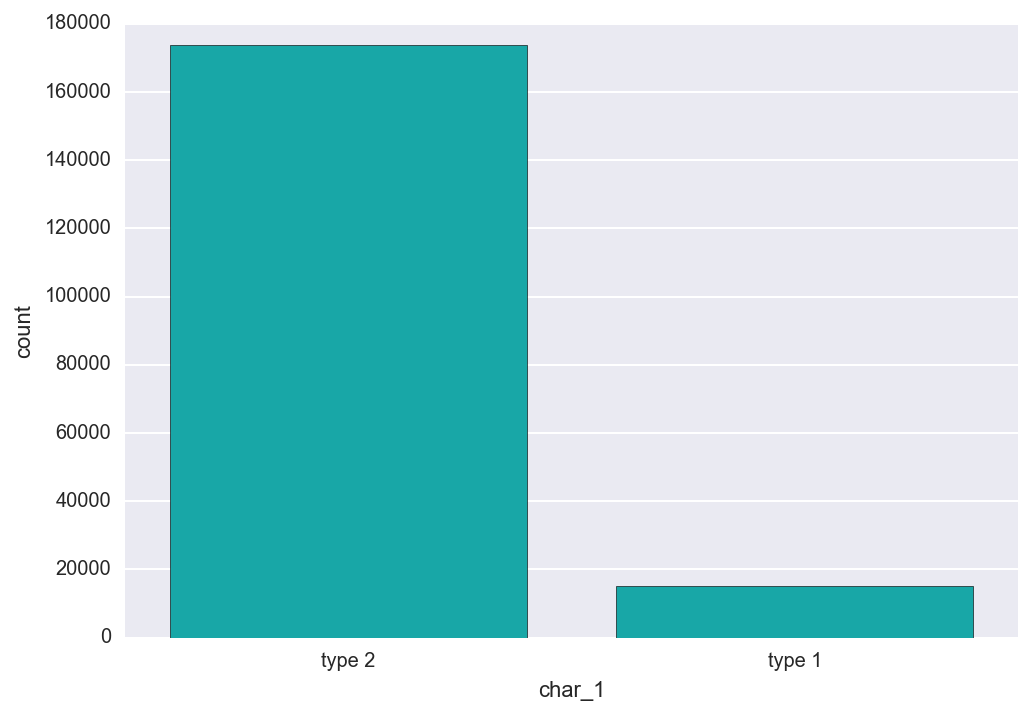

In [105]:
sns.countplot(x="char_1", data=people, color="c")

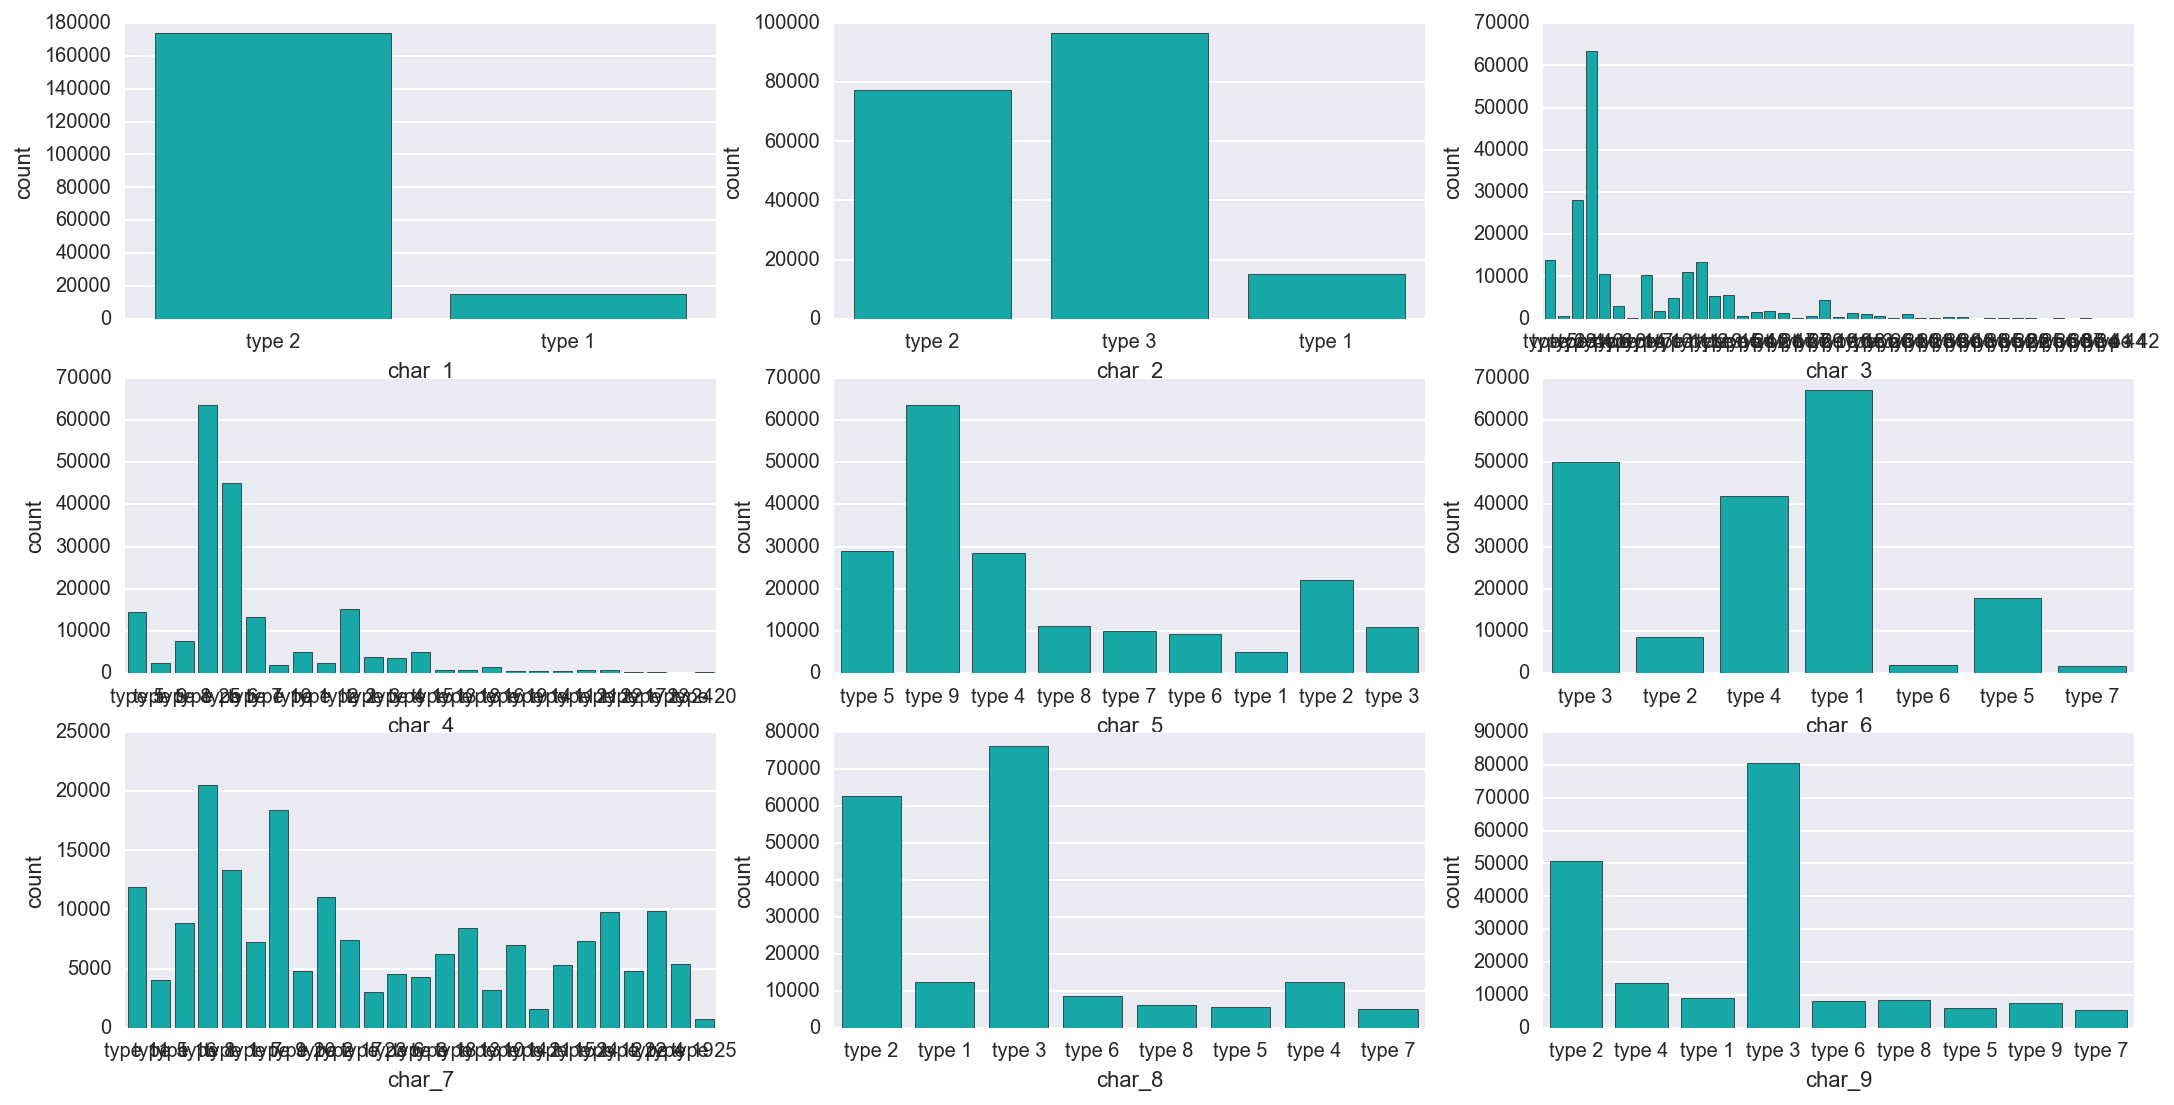

In [136]:
plt.figure(figsize=(18, 9))
for i in range(1, 10):
    plt.subplot(3, 3, i)
    x_name = 'char_' + str(i)    
    sns.countplot(x=x_name, data=people, color="c")

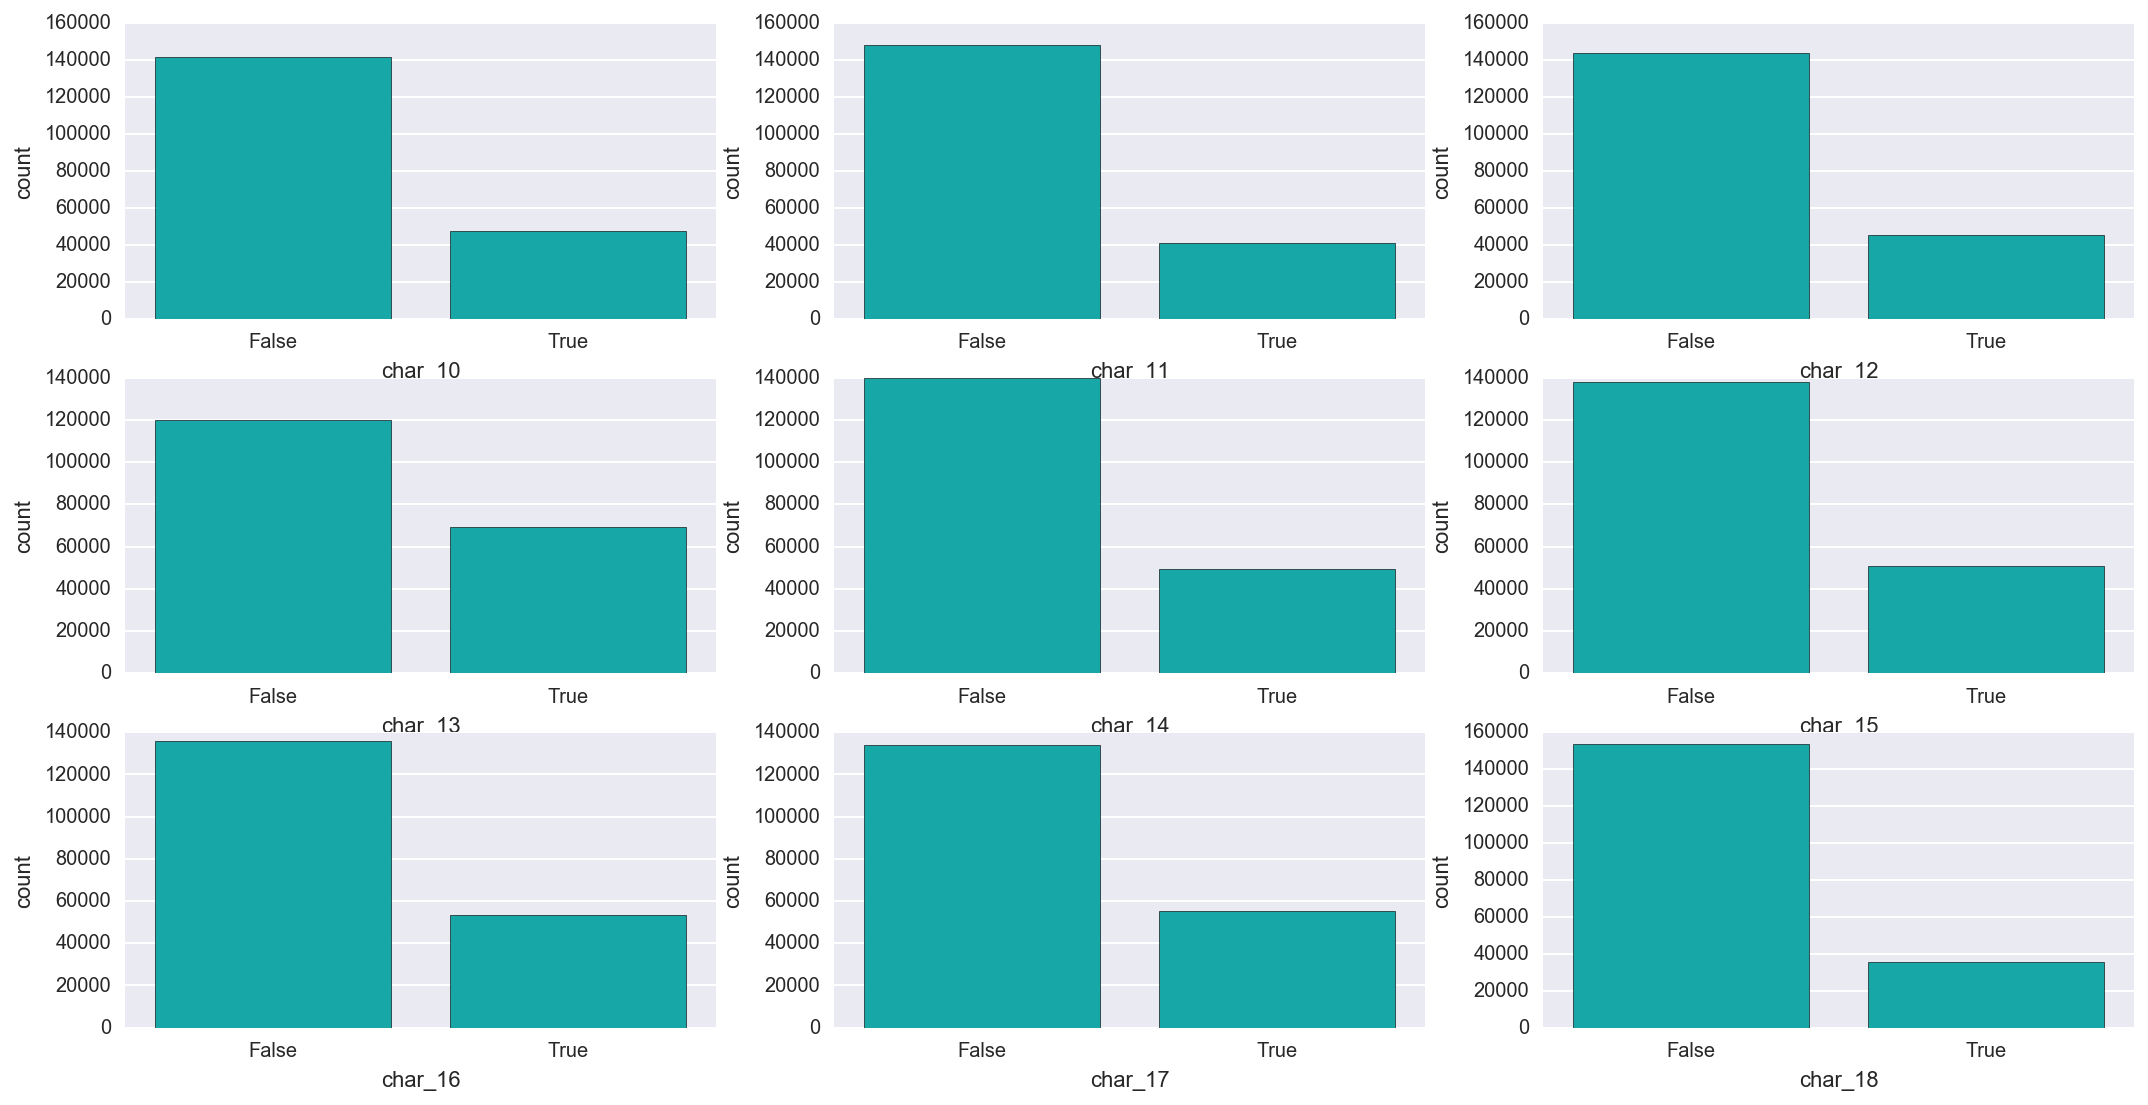

In [137]:
plt.figure(figsize=(18, 9))
for i in range(1, 10):
    plt.subplot(3, 3, i)
    x_name = 'char_' + str(i+9)  
    sns.countplot(x=x_name, data=people, color="c")

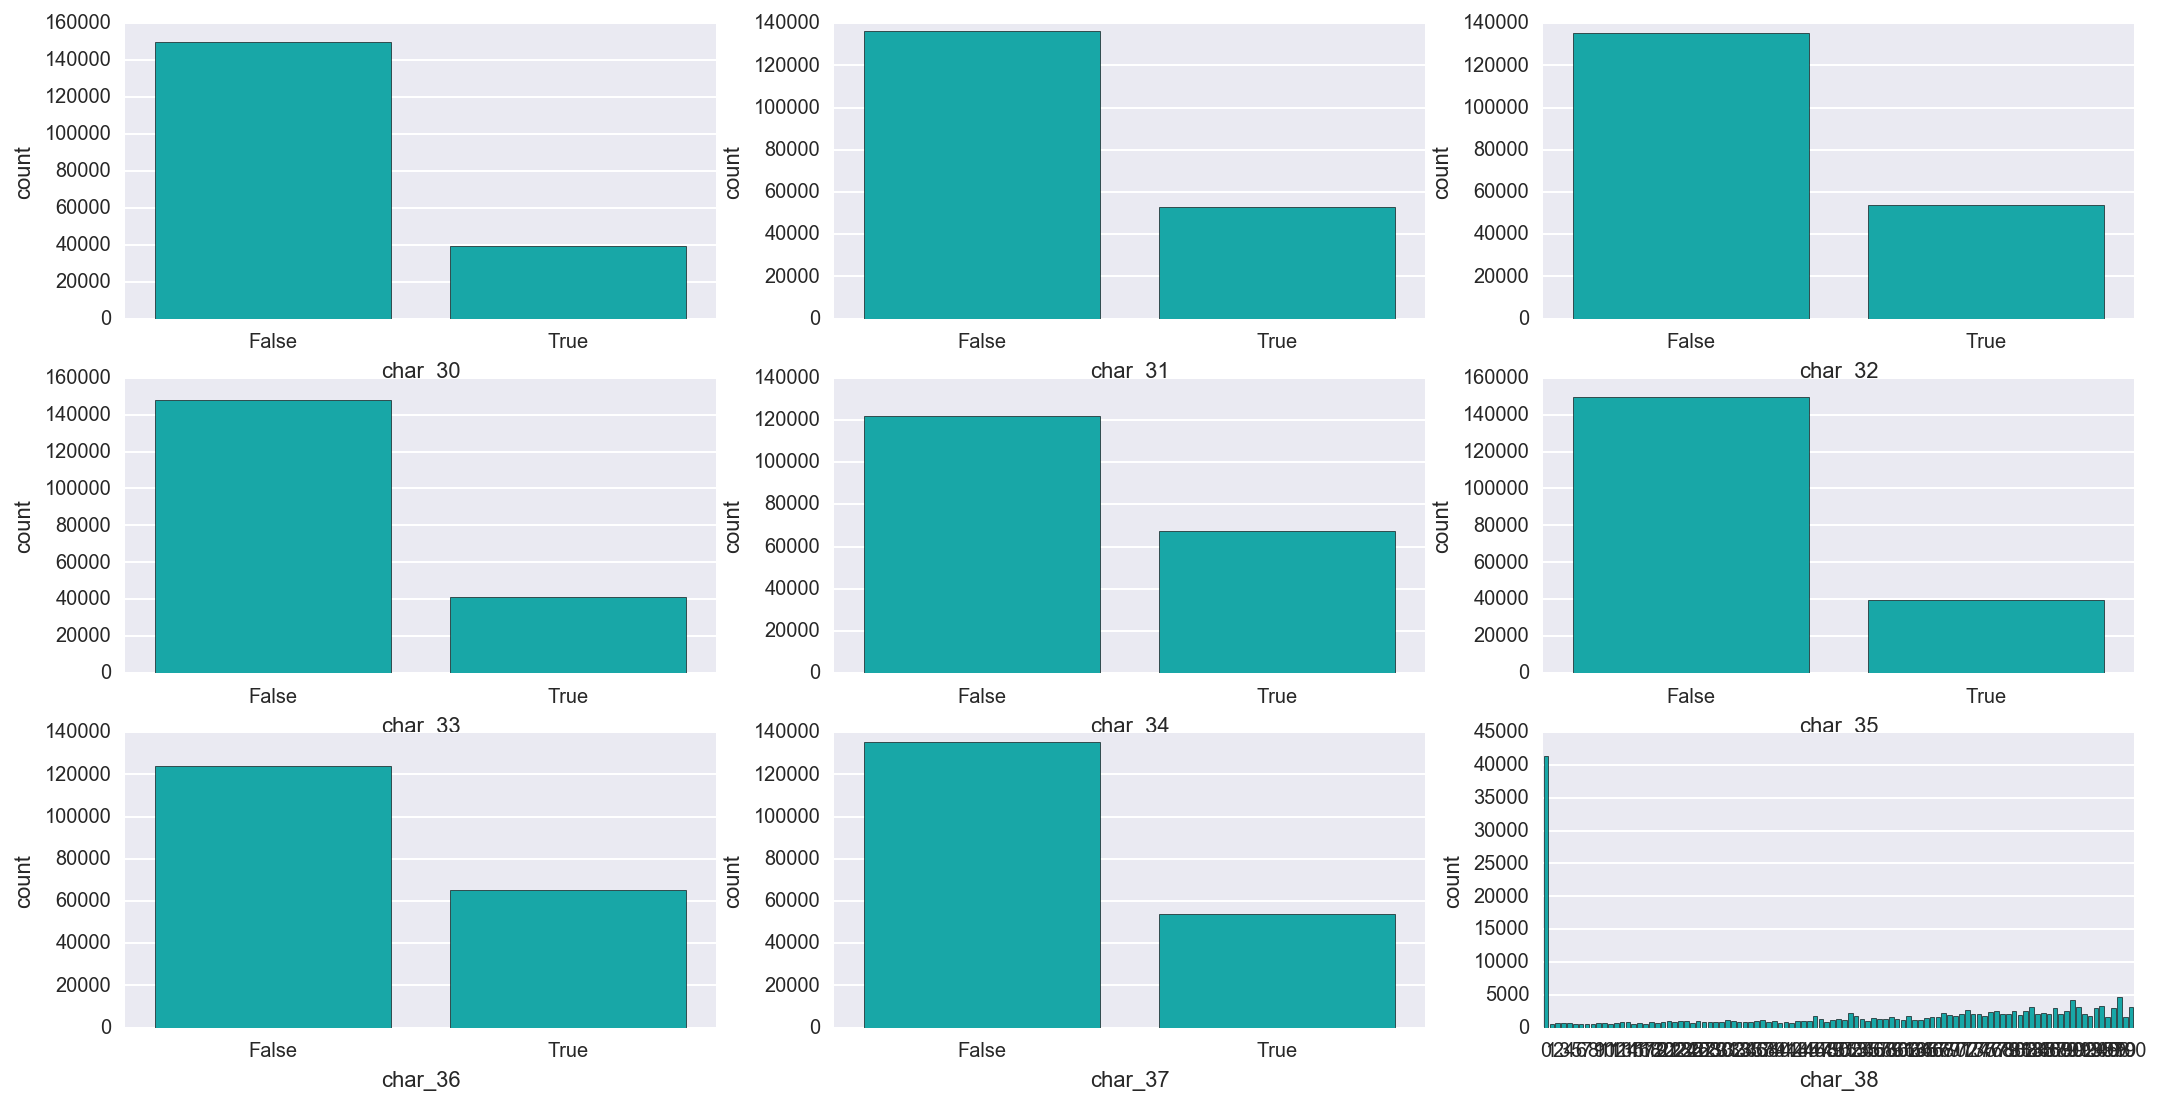

In [138]:
plt.figure(figsize=(18, 9))
for i in range(1, 10):
    plt.subplot(3, 3, i)
    x_name = 'char_' + str(i+29)  
    sns.countplot(x=x_name, data=people, color="c")

In [141]:
print people['char_38'].nunique(), sorted(people['char_38'].unique())

101 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]


In [150]:
print activity['activity_category'].nunique(), activity['activity_category'].unique()

7 ['type 4' 'type 2' 'type 3' 'type 5' 'type 1' 'type 7' 'type 6']


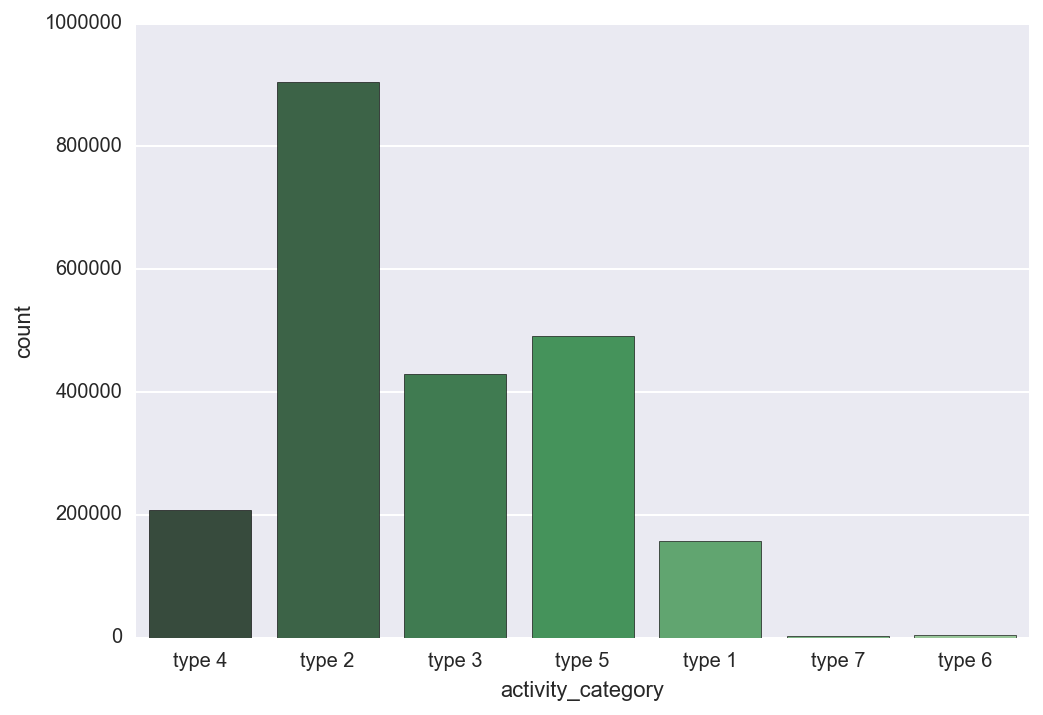

In [84]:
sns.countplot(x="activity_category", data=activity, palette="Greens_d");

In [92]:
print activity[activity['activity_category']=='type 5']['char_10'].unique()

['type 5493' 'type 489' 'type 584' ..., 'type 7356' 'type 6865' 'type 7379']


In [97]:
#sns.countplot(x='char_10', data=activity[activity['activity_category']=='type 5'], palette="Greens_d")

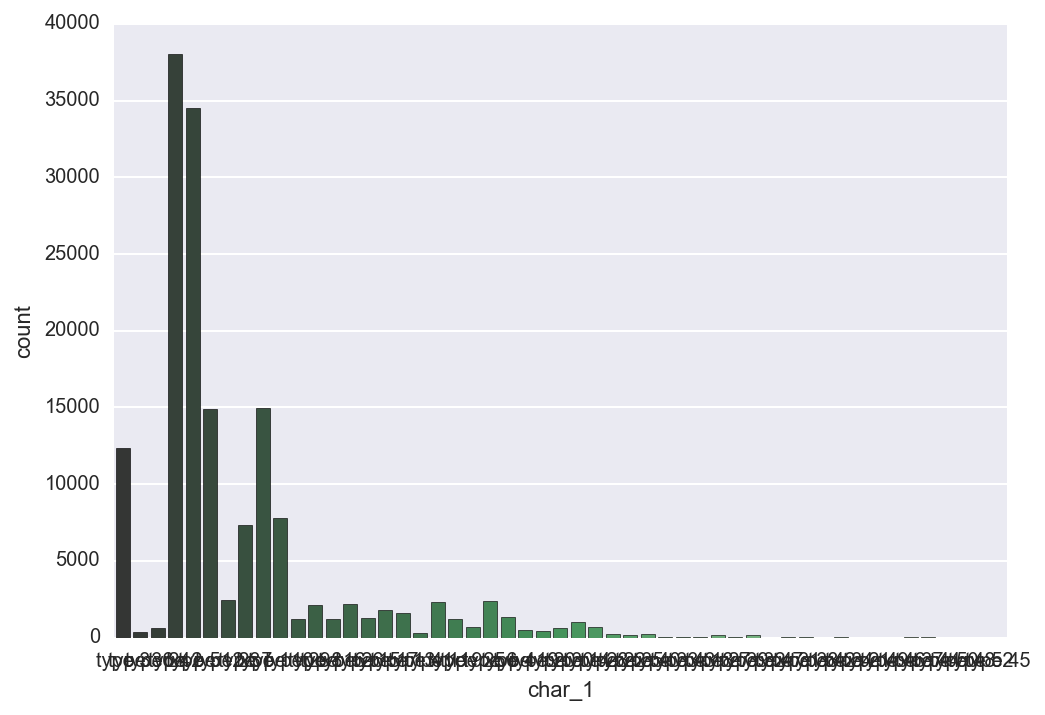

In [142]:
sns.countplot(x="char_1", data=activity, palette="Greens_d");

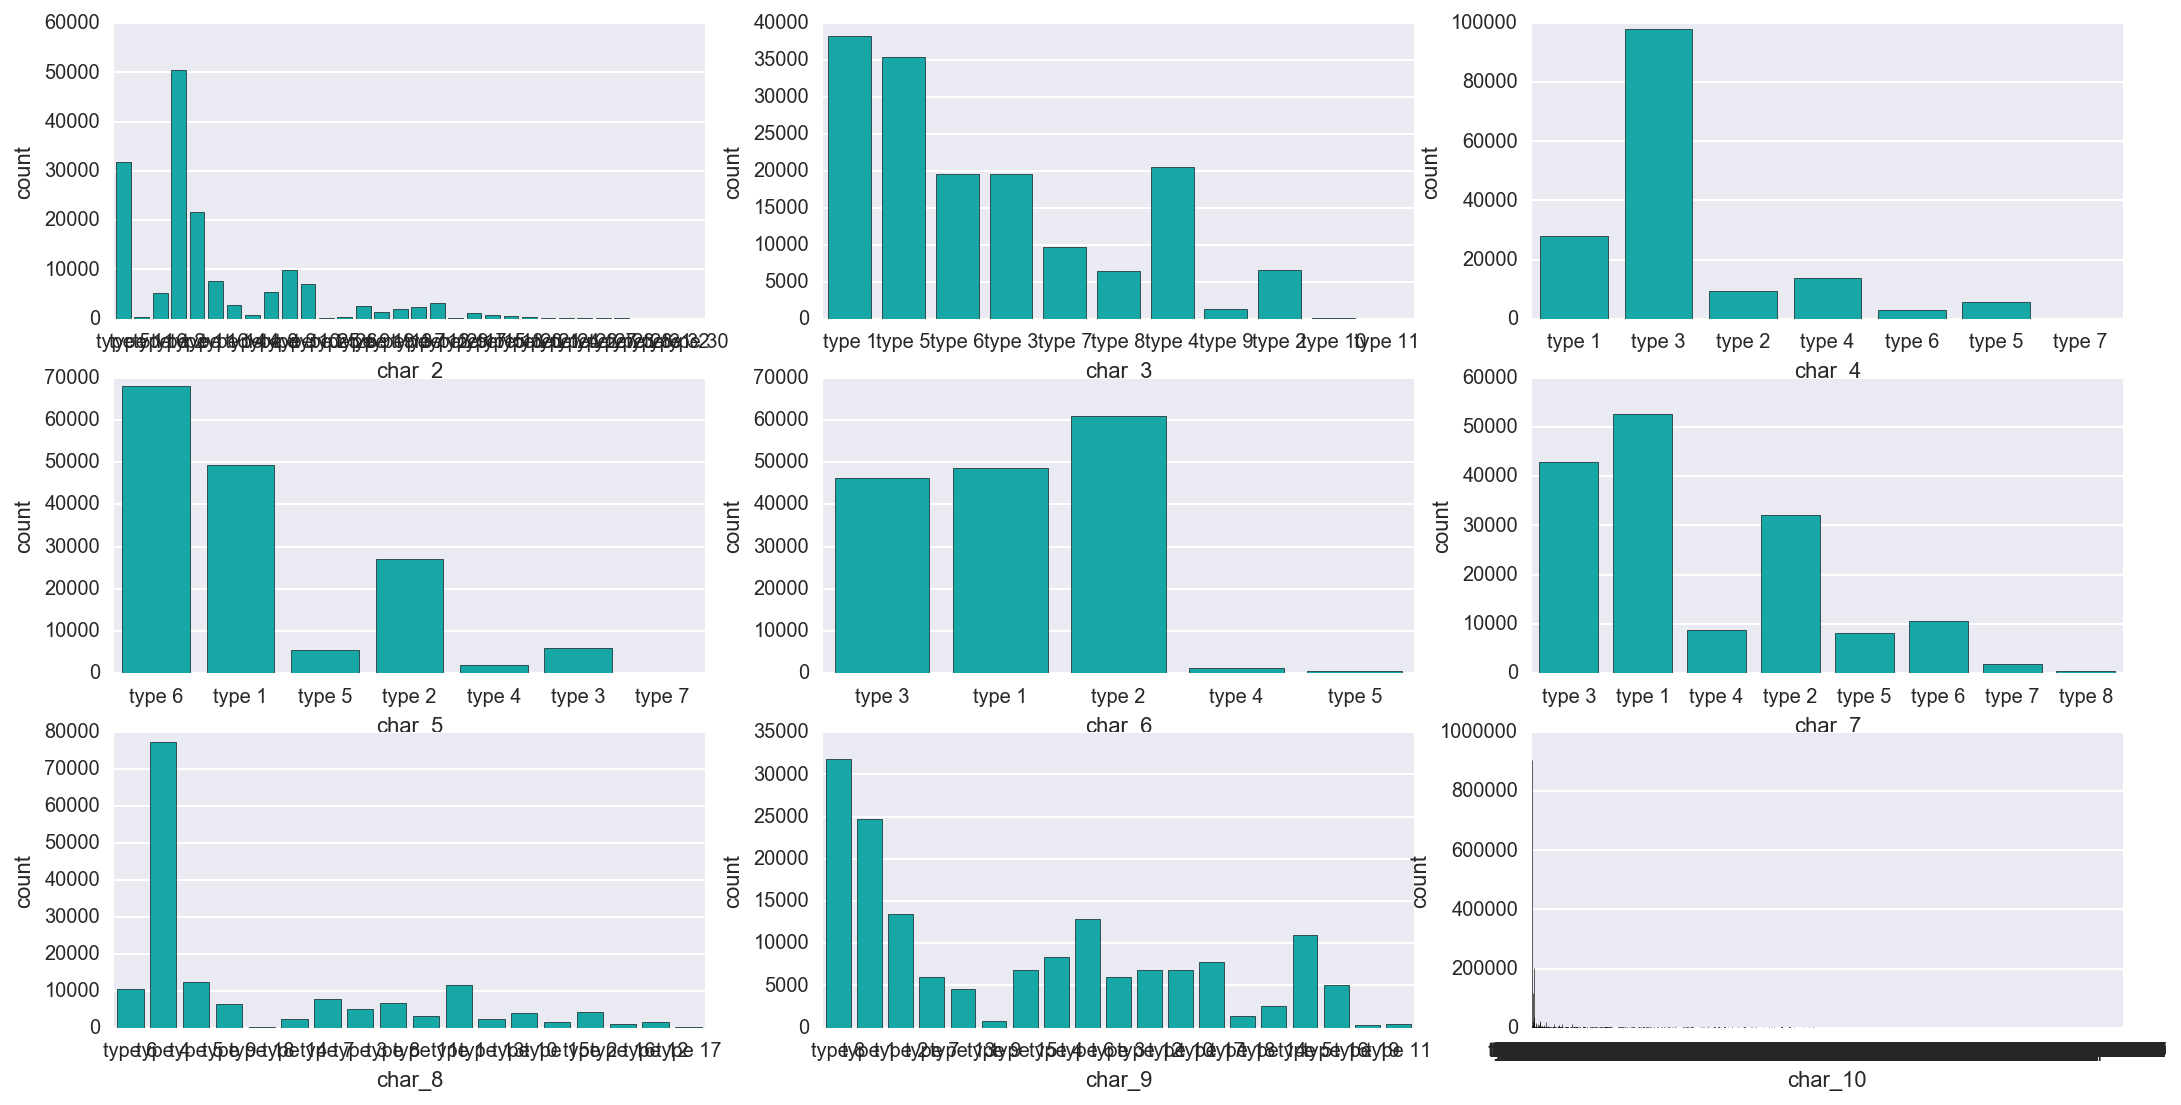

In [145]:
plt.figure(figsize=(18, 9))
for i in range(1, 10):
    plt.subplot(3, 3, i)
    x_name = 'char_' + str(i+1)  
    sns.countplot(x=x_name, data=activity, color="c")
    #sns.countplot(x="activity_category", data=activity, palette="Greens_d");

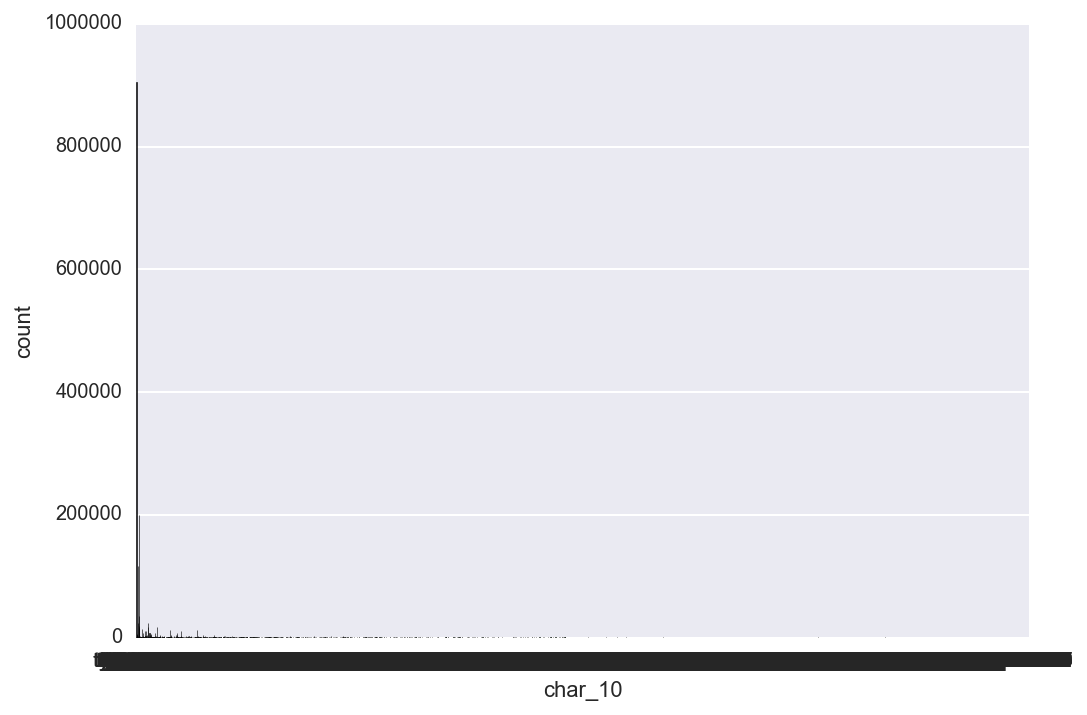

In [146]:
sns.countplot(x="char_10", data=activity, palette="Greens_d");

In [148]:
print activity['char_10'].nunique(), activity['char_10'].unique()

6515 ['type 76' 'type 1' 'type 1727' ..., 'type 7356' 'type 6865' 'type 7379']


In [152]:
print activity['outcome'].nunique(), activity['outcome'].unique()

2 [0 1]


In [47]:
combined = pd.merge(people, activity, how='inner', on='people_id', left_on=None, right_on=None,
      left_index=False, right_index=False, sort=True,
      suffixes=('_x', '_y'), copy=True, indicator=False)

In [48]:
combined.head(3)

,people_id,date_x,group_1,char_1_x,char_2_x,char_3_x,char_4_x,char_5_x,char_6_x,char_7_x,...,char_2_y,char_3_y,char_4_y,char_5_y,char_6_y,char_7_y,char_8_y,char_9_y,char_10_y,outcome
0,ppl_100,2021-06-29,group 17304,type 2,type 2,type 5,type 5,type 5,type 3,type 11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 76,0
1,ppl_100,2021-06-29,group 17304,type 2,type 2,type 5,type 5,type 5,type 3,type 11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,0
2,ppl_100,2021-06-29,group 17304,type 2,type 2,type 5,type 5,type 5,type 3,type 11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,0
